In [286]:
import pandas as pd
from datetime import datetime
pd.options.mode.copy_on_write = True

arquivo_csv = './samsunghealth_daniel.frogel_20240712095226/com.samsung.shealth.activity.day_summary.20240712095226.csv'

df = pd.read_csv(arquivo_csv, usecols=[6,12])

In [287]:
df.reset_index(drop=True, inplace=True)
df

,active_time,create_time
0,0,2018-10-09 00:12:29.561
1,0,2018-10-09 00:12:30.288
2,0,2018-10-09 00:12:30.488
3,0,2018-10-09 00:12:30.618
4,0,2018-10-09 00:12:30.731
...,...,...
2127,4601327,2024-07-08 03:00:00.583
2128,0,2024-07-09 04:24:41.432
2129,5778000,2024-07-10 03:00:01.044
2130,4569807,2024-07-11 03:02:15.912


In [288]:
df_active = df['active_time']
df_active

0             0
1             0
2             0
3             0
4             0
         ...   
2127    4601327
2128          0
2129    5778000
2130    4569807
2131          0
Name: active_time, Length: 2132, dtype: int64

In [289]:
df_data = df['create_time'].apply(lambda x: x[0:10])
df_data

0       2018-10-09
1       2018-10-09
2       2018-10-09
3       2018-10-09
4       2018-10-09
           ...    
2127    2024-07-08
2128    2024-07-09
2129    2024-07-10
2130    2024-07-11
2131    2024-07-12
Name: create_time, Length: 2132, dtype: object

In [290]:
df_datas = pd.to_datetime(df_data, format='%Y-%m-%d', yearfirst=True)
df_datas

0      2018-10-09
1      2018-10-09
2      2018-10-09
3      2018-10-09
4      2018-10-09
          ...    
2127   2024-07-08
2128   2024-07-09
2129   2024-07-10
2130   2024-07-11
2131   2024-07-12
Name: create_time, Length: 2132, dtype: datetime64[ns]

In [291]:
df_ok = pd.merge(df_active, df_datas, left_index=True, right_index=True, how='outer')
df_ok

,active_time,create_time
0,0,2018-10-09
1,0,2018-10-09
2,0,2018-10-09
3,0,2018-10-09
4,0,2018-10-09
...,...,...
2127,4601327,2024-07-08
2128,0,2024-07-09
2129,5778000,2024-07-10
2130,4569807,2024-07-11


In [292]:
df_2024 = df_ok.query('("2024-01-01" <= create_time <= "2024-12-31") & active_time > 0')
df_2024

,active_time,create_time
1938,374185,2024-01-01
1939,4627609,2024-01-02
1940,4575221,2024-01-03
1941,4686686,2024-01-04
1942,4195156,2024-01-05
...,...,...
2125,3079288,2024-07-06
2126,6513348,2024-07-07
2127,4601327,2024-07-08
2129,5778000,2024-07-10


In [293]:
df_2024['mes'] = df_2024['create_time'].dt.month

In [294]:
df_2024

,active_time,create_time,mes
1938,374185,2024-01-01,1
1939,4627609,2024-01-02,1
1940,4575221,2024-01-03,1
1941,4686686,2024-01-04,1
1942,4195156,2024-01-05,1
...,...,...,...
2125,3079288,2024-07-06,7
2126,6513348,2024-07-07,7
2127,4601327,2024-07-08,7
2129,5778000,2024-07-10,7


In [295]:
df_2024.drop(columns='active_time', inplace=True)
df_2024

,create_time,mes
1938,2024-01-01,1
1939,2024-01-02,1
1940,2024-01-03,1
1941,2024-01-04,1
1942,2024-01-05,1
...,...,...
2125,2024-07-06,7
2126,2024-07-07,7
2127,2024-07-08,7
2129,2024-07-10,7


<Axes: xlabel='mes'>

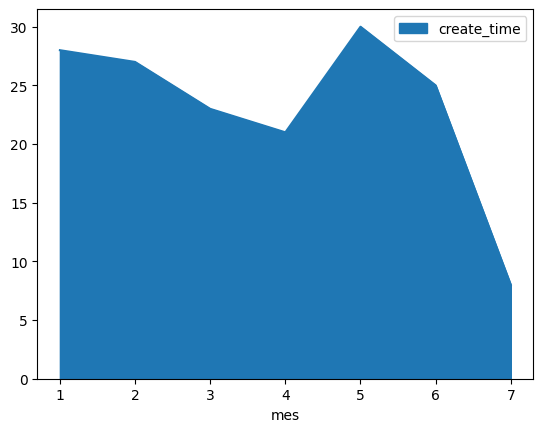

In [296]:
df_2024.groupby('mes').count().plot(kind='area')